In [1]:
from pycaret.classification import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import os
from sklearn.metrics import log_loss
import preprocessing as pr

In [2]:
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm
        #fm._rebuild()
        plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [3]:
path = '../../../data/카드'

train = pd.read_csv(os.path.join(path, 'train.csv'), index_col=0)
test = pd.read_csv(os.path.join(path, 'test.csv'), index_col=0)
sub = pd.read_csv(os.path.join(path, 'sample_submission.csv'), index_col=0)

train = pr.main(train)

In [5]:
# missing value에 대해 'not_available impute'
clf = setup(train, target='credit', session_id=42)

,Description,Value
0,session_id,42
1,Target,credit
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(26457, 18)"
5,Missing Values,True
6,Numeric Features,5
7,Categorical Features,12
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
add_metric('logloss', 'LogLoss', log_loss, greater_is_better=False, target="pred_proba")

Name                                                           LogLoss
Display Name                                                   LogLoss
Score Function               <function log_loss at 0x000002467ACA48B0>
Scorer               make_scorer(log_loss, greater_is_better=False,...
Target                                                      pred_proba
Args                                                                {}
Greater is Better                                                False
Multiclass                                                        True
Custom                                                            True
Name: logloss, dtype: object

In [7]:
compare_models(sort = 'logloss', exclude=['svm','ridge'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss,TT (Sec)
catboost,CatBoost Classifier,0.7048,0.7103,0.4491,0.6939,0.6422,0.2735,0.3365,0.7590,2.0010
xgboost,Extreme Gradient Boosting,0.7048,0.7148,0.4560,0.6855,0.6466,0.2810,0.3381,0.7592,1.8360
lightgbm,Light Gradient Boosting Machine,0.7002,0.7048,0.4285,0.6936,0.6258,0.2418,0.3218,0.7636,0.2230
gbc,Gradient Boosting Classifier,0.6946,0.6579,0.4109,0.6450,0.6101,0.2137,0.3044,0.7926,1.0870
lda,Linear Discriminant Analysis,0.6454,0.6120,0.3401,0.5385,0.5166,0.0195,0.0624,0.8588,0.0530
nb,Naive Bayes,0.6446,0.6101,0.3348,0.5563,0.5065,0.0048,0.0374,0.8616,0.0230
lr,Logistic Regression,0.6436,0.5739,0.3333,0.4142,0.5040,0.0000,0.0000,0.8709,0.4710
rf,Random Forest Classifier,0.7012,0.7455,0.5402,0.6800,0.6848,0.3708,0.3772,1.0047,0.2890
ada,Ada Boost Classifier,0.6929,0.6285,0.4055,0.6275,0.6044,0.2013,0.3007,1.0806,0.1530
et,Extra Trees Classifier,0.6716,0.7064,0.5154,0.6500,0.6563,0.3136,0.3181,2.4057,0.3160


In [25]:
xgb = create_model('xgboost')
cat = create_model('catboost')
lgb = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.7014,0.6910,0.4301,0.7180,0.6265,0.2408,0.3271,0.7626
1,0.7073,0.6978,0.4419,0.7169,0.6380,0.2661,0.3445,0.7587
2,0.7041,0.7032,0.4353,0.7232,0.6319,0.2539,0.3354,0.7622
3,0.6906,0.6753,0.4129,0.6640,0.6100,0.2106,0.2910,0.7915
4,0.6987,0.7115,0.4259,0.7155,0.6223,0.2308,0.3185,0.7610
5,0.7014,0.7269,0.4312,0.6921,0.6285,0.2501,0.3250,0.7575
6,0.7073,0.7270,0.4367,0.6978,0.6352,0.2617,0.3459,0.7461
7,0.6960,0.7116,0.4182,0.6904,0.6159,0.2233,0.3090,0.7618
8,0.7019,0.7000,0.4317,0.6933,0.6289,0.2496,0.3274,0.7653
9,0.6969,0.7177,0.4249,0.6907,0.6221,0.2332,0.3095,0.7603


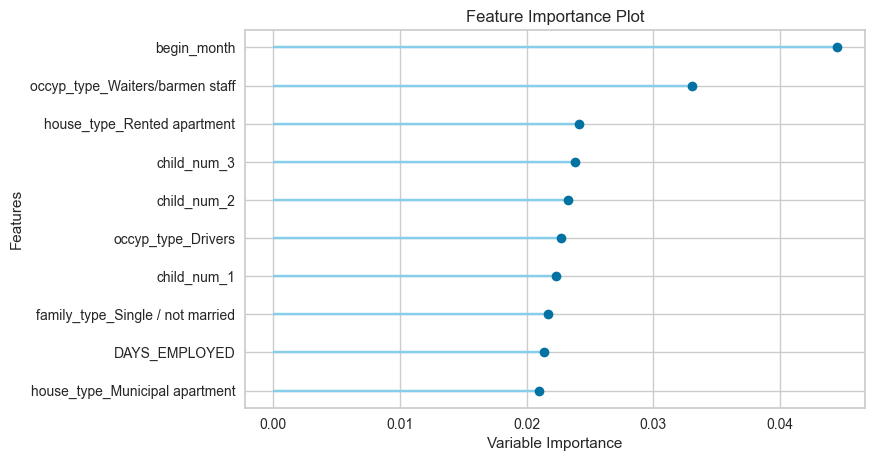

In [26]:
plot_model(estimator=xgb, plot='feature')

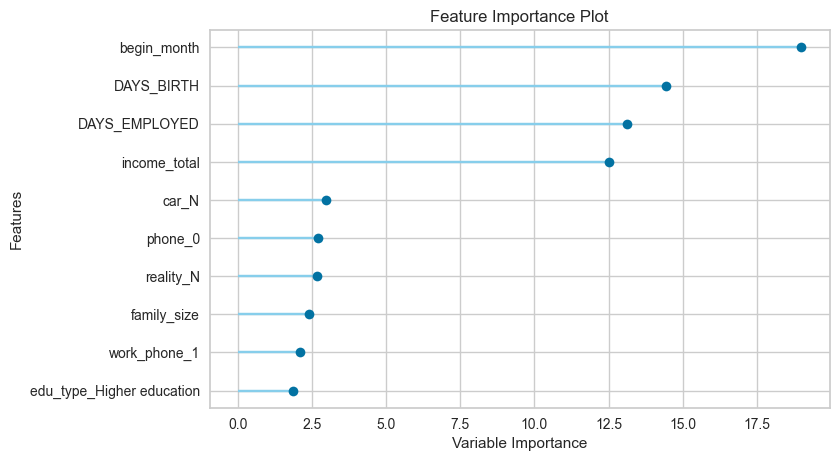

In [27]:
plot_model(estimator=cat, plot='feature')

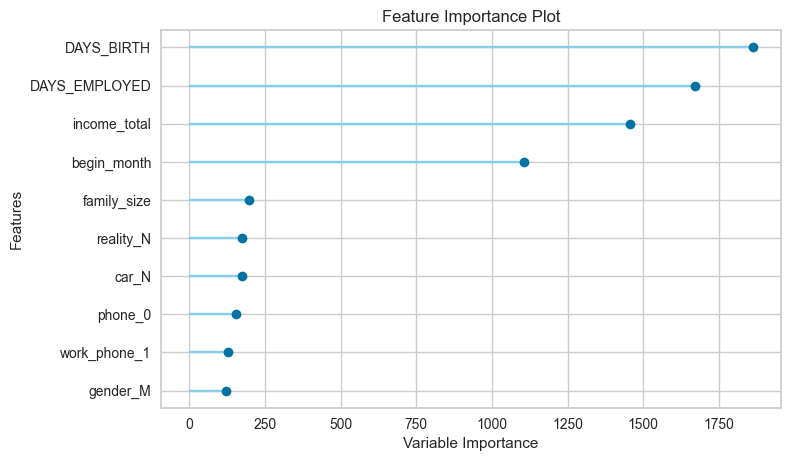

In [28]:
plot_model(estimator=lgb, plot='feature')